In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Loading the file
df = pd.read_csv(r'C:\Users\bluecom011\Desktop\1월\4주차\01.15\Auto Sales data.csv',parse_dates=['ORDERDATE'], dayfirst=True)

In [3]:
#Checking samples of the data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
#Dimentions of the data
df.shape

(2747, 20)

In [5]:
# 필요한 라이브러리를 가져옵니다.
from datetime import datetime

# 날짜를 정의합니다.
temp_date = datetime(2020, 6, 1)

# 'DAYS_SINCE_LASTORDER'를 기반으로 한 새로운 특성 생성
df['DAYS_SINCE_LASTORDER'] = (temp_date - df['ORDERDATE']).dt.days

# 이미 존재하는 'DAYS_SINCE_LASTORDER' 열이 있다면 삭제합니다.
if 'DAYS_SINCE_LASTORDER' in df.columns:
    df = df.drop('DAYS_SINCE_LASTORDER', axis=1)


In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2747 non-null   int64         
 1   QUANTITYORDERED   2747 non-null   int64         
 2   PRICEEACH         2747 non-null   float64       
 3   ORDERLINENUMBER   2747 non-null   int64         
 4   SALES             2747 non-null   float64       
 5   ORDERDATE         2747 non-null   datetime64[ns]
 6   STATUS            2747 non-null   object        
 7   PRODUCTLINE       2747 non-null   object        
 8   MSRP              2747 non-null   int64         
 9   PRODUCTCODE       2747 non-null   object        
 10  CUSTOMERNAME      2747 non-null   object        
 11  PHONE             2747 non-null   object        
 12  ADDRESSLINE1      2747 non-null   object        
 13  CITY              2747 non-null   object        
 14  POSTALCODE        2747 n

In [7]:
# 수치형 컬럼명 변경
new_column_names = {'QUANTITYORDERED': '주문수량',
                    'PRICEEACH': '개당가격',
                    'ORDERLINENUMBER': '로트번호',
                    'SALES': '판매액',
                    'MSRP': '제조사권장 소비자가격'}
df.rename(columns=new_column_names, inplace=True)

In [8]:
# df에서 수치형 변수들을 선택
df_num = df.select_dtypes(include=['float64', 'int64'])

# 'ORDERNUMBER' 컬럼을 제외한 나머지 수치형 변수들을 포함하는 새로운 데이터프레임 생성
df_num = df_num.drop(columns=['ORDERNUMBER'])

# 변경된 데이터프레임의 컬럼들과 컬럼의 개수 출력
print(df_num.columns, len(list(df_num.columns.values)))


Index(['주문수량', '개당가격', '로트번호', '판매액', '제조사권장 소비자가격'], dtype='object') 5


In [9]:
# 컬럼명 변경
new_column_names2 = {'STATUS': '주문상태',
                    'PRODUCTLINE': '제품라인',
                    'PRODUCTCODE': '제품코드',
                    'CUSTOMERNAME': '고객명',
                    'CITY': '도시',
                    'POSTALCODE': '우편번호',
                    'COUNTRY': '국가',
                    'DEALSIZE': '거래규모'}
df.rename(columns=new_column_names2, inplace=True)

In [10]:
# df에서 범주형 변수들을 선택
df_cat = df.select_dtypes(include=['object'])

# 특정한 몇 개의 범주형 변수를 제외한 나머지를 포함하는 새로운 데이터프레임 생성
df_cat = df_cat.drop(columns=['PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'])

# 변경된 데이터프레임의 컬럼들과 컬럼의 개수 출력
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['주문상태', '제품라인', '제품코드', '고객명', '도시', '우편번호', '국가', '거래규모'], dtype='object') 8


In [11]:
# 데이터프레임의 수치형 변수들에 대한 기술 통계량 계산
descriptive_stats = df_num.describe()

# 기술 통계량을 행과 열을 전환하여 출력하고, 소수점 둘째자리까지 표시
display(round(descriptive_stats, 2).T)

,count,mean,std,min,25%,50%,75%,max
주문수량,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
개당가격,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
로트번호,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
판매액,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
제조사권장 소비자가격,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


QUANTITYORDERED: 주문 수량


PRICEEACH	:개당가격

ORDERLINENUMBER: 고유한 식별 번호

SALES	:판매액 또는 매출

MSRP : 제조사 권장 소비자 가격

결측치 확인

In [12]:
#Missing values
df.isnull().sum()

ORDERNUMBER         0
주문수량                0
개당가격                0
로트번호                0
판매액                 0
ORDERDATE           0
주문상태                0
제품라인                0
제조사권장 소비자가격         0
제품코드                0
고객명                 0
PHONE               0
ADDRESSLINE1        0
도시                  0
우편번호                0
국가                  0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
거래규모                0
dtype: int64

중복값확인

In [13]:
#Checking duplicate values
df.duplicated().sum()

0

Univariate Analysis

In [14]:
import plotly.express as px

# DataFrame에서 카테고리형 열 선택
cat_columns = df[['주문상태', '제품라인', '거래규모']]

# 단일 변수 분석 함수 정의
def univariateAnalysis_category(cols):
    print(cols, "의 분포")
    print("_"* 60)
    
    # 그래프 색상 설정
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    
    # 카테고리별 빈도수 계산
    value_counts = cat_columns[cols].value_counts()
    
    # Count plot 그리기
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values,
                 title=f'{cols}의 분포', labels={'x': '카테고리', 'y': '빈도'}, color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    
    # Donut chart 그리기
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(values=percentage, names=value_counts.index,
                 labels={'names': '카테고리', 'values': '백분율'}, hole=0.5, color_discrete_sequence=colors)
    fig.add_annotation(x=0.5, y=0.5, align="center", xref="paper",
                       yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    
    print("       ")

# 모든 카테고리형 열에 대해 함수 호출
for x in cat_columns:
    univariateAnalysis_category(x)


주문상태 의 분포
____________________________________________________________


       
제품라인 의 분포
____________________________________________________________


       
거래규모 의 분포
____________________________________________________________


In [17]:
# 'COUNTRY' 열에서 상위 10개 국가의 빈도수 계산
country_counts = df['국가'].value_counts()[:10]

# Funnel chart 그리기
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))

# 그래프 레이아웃 설정
fig.update_layout(title_text='상위 10 국가 분포', template='plotly_white')
fig.show()


In [18]:
# 'CITY' 열에서 상위 10개 도시의 빈도수 계산
city_counts = df['도시'].value_counts()[:10]

# Funnel chart 그리기
fig = go.Figure(go.Funnel(y=city_counts.index,
    x=city_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))

# 그래프 레이아웃 설정
fig.update_layout(title_text='상위 10 도시 분포', template='plotly_white')
fig.show()


In [27]:
#kmeans 클러스터링
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 군집화에 사용할 변수 선택 (예: df_num 데이터프레임 사용)
X = df_num.values

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 모델 생성 및 군집화
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 군집화 결과 출력
print(df[['도시', 'cluster']])

# 필요에 따라 다른 컬럼을 선택하여 출력하시면 됩니다.


              도시  cluster
0            NYC        0
1          Reims        0
2          Paris        0
3       Pasadena        0
4     Burlingame        0
...          ...      ...
2742      Madrid        2
2743        Oulu        0
2744      Madrid        1
2745    Toulouse        0
2746      Boston        2

[2747 rows x 2 columns]


In [28]:
# 'SALES' 열을 기준으로 내림차순 정렬하여 상위 10개 고객 선택
top10customer = df.sort_values(by="판매액", ascending=False).head(10)

# 상위 10개 고객의 빈도수 계산
top10customer_counts = top10customer['고객명'].value_counts()

# Funnel chart 그리기
fig = go.Figure(go.Funnel(y=top10customer_counts.index, x=top10customer_counts.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))

# 그래프 레이아웃 설정
fig.update_layout(title_text='상위 10 고객 분포', template='plotly_white')
fig.show()


모든 변수간 관계파악

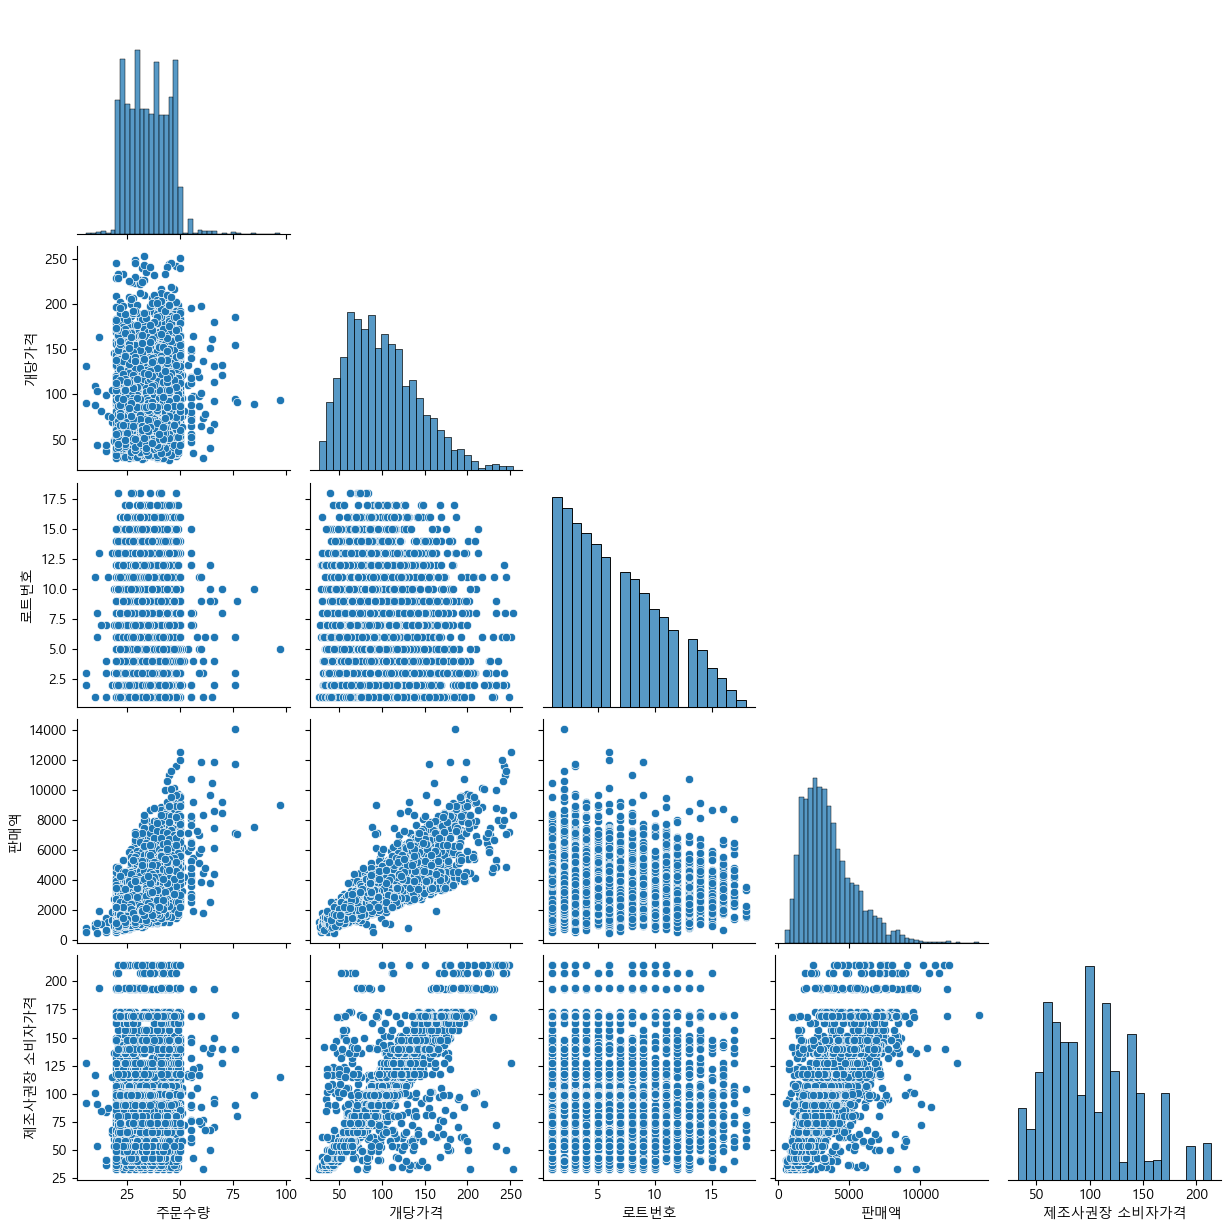

In [49]:
sns.pairplot(data=df_num, corner = True )

EDA 해석

개당 가격과 판매액은 강한 양의 선형성을 보임

개당 가격과 권장 소비자가격은 양의 상관관계를 보임

판매액고 권장 소비자 가격도 어느정도 상관성이 있어보임

주문 수량과 판매액은 양의 선형성을 보임

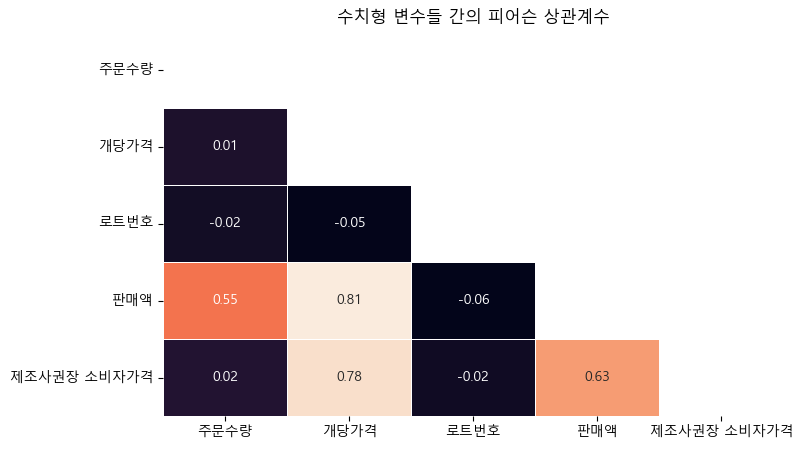

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 피어슨 상관계수 계산
corr = df_num.corr(method='pearson')

# 삼각 행렬 형태의 마스크 생성
mask = np.triu(np.ones_like(corr))

# 그림판 크기 설정
fig, ax = plt.subplots(figsize=(8, 5))

# seaborn 라이브러리의 heatmap 함수를 사용하여 피어슨 상관계수를 시각화
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cbar=None, linewidth=0.5)

# 타이틀에 한글 추가
plt.title('수치형 변수들 간의 피어슨 상관계수')

# 그래프 출력
plt.show()


개당가격과 판매액은 강한 양의 상관관계

판매액과 주문수량은 어느정도의 상관관계

판매액과 제조사 권장 소비자가격은 높은 상관관계

개당가격과 제조사 권장 소비자가격은 높은 상관관계

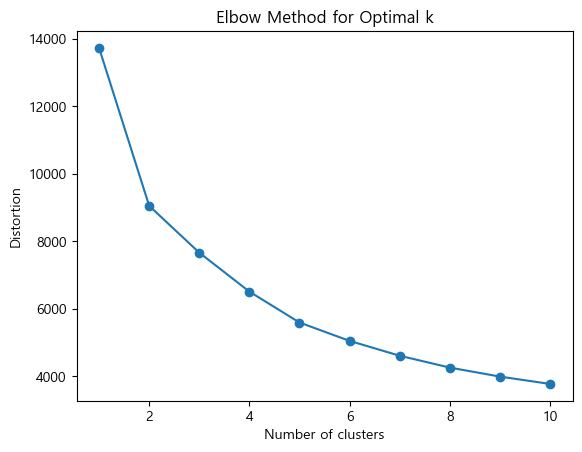

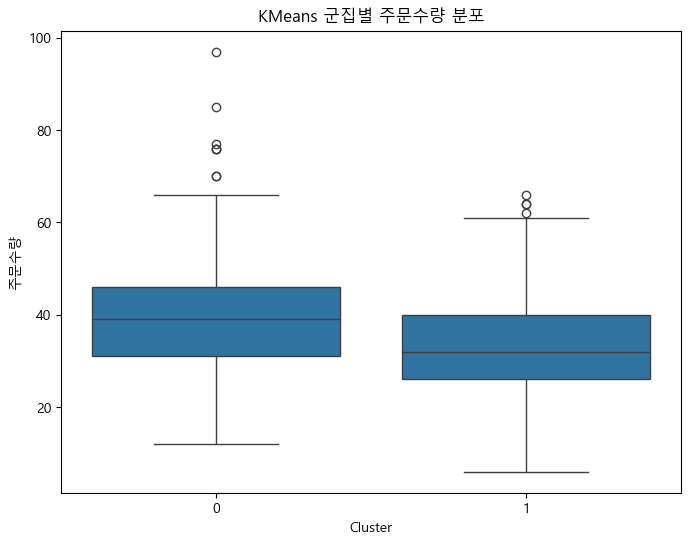

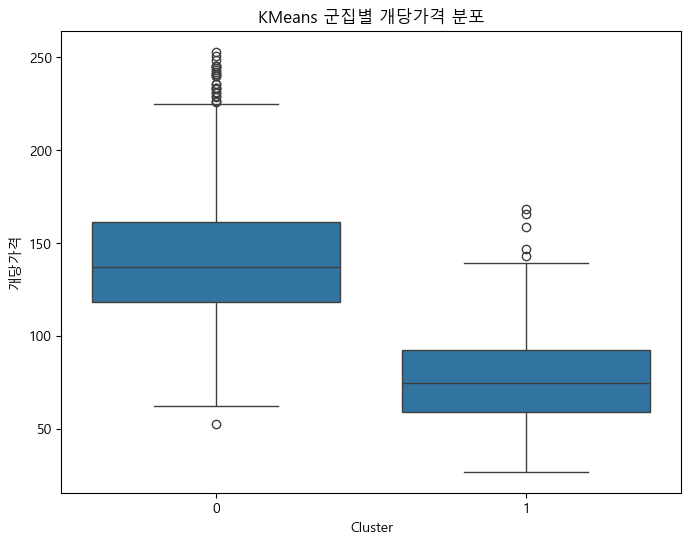

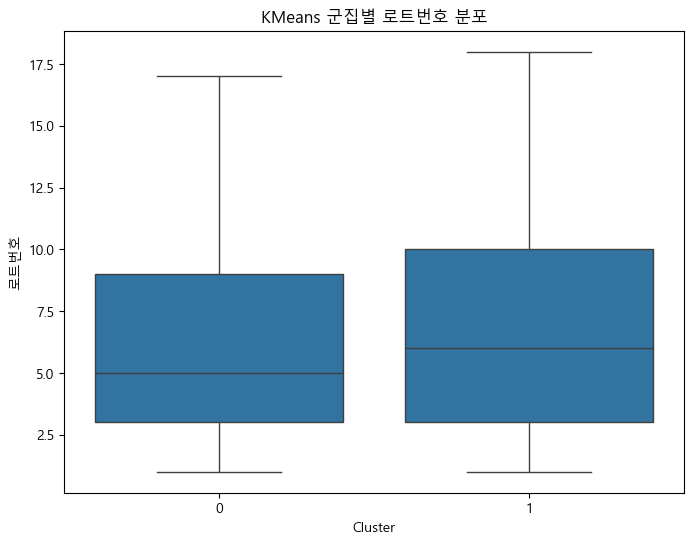

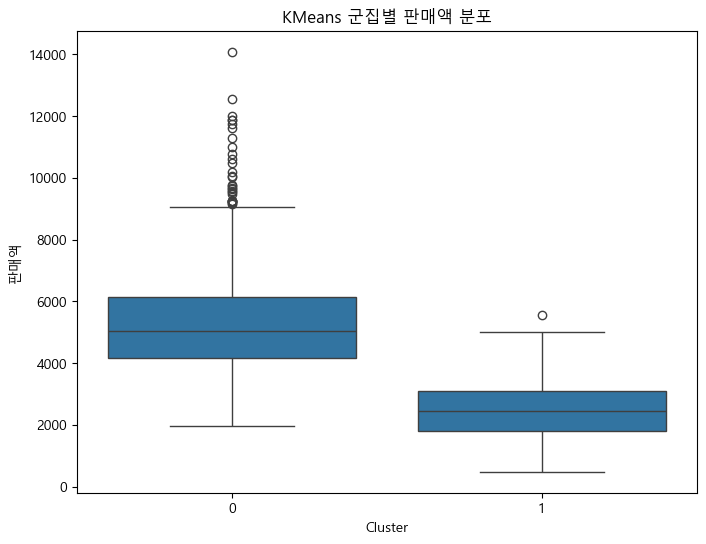

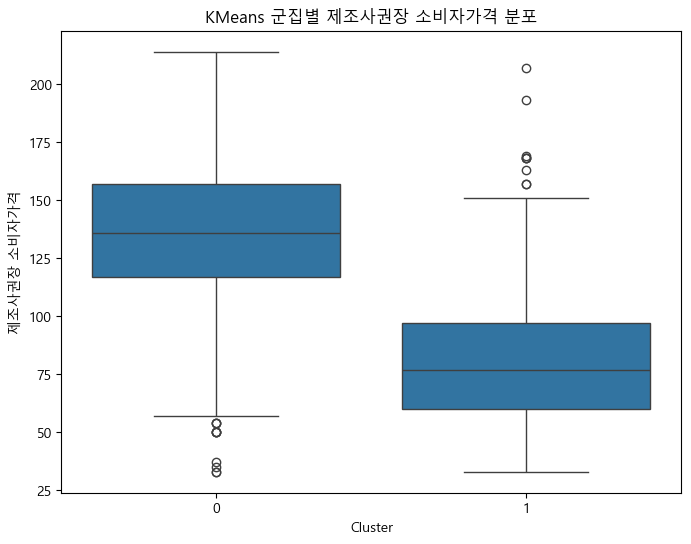

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

class KMeansClustering:
    def __init__(self, df, selected_variables):
        # 생성자에서 데이터프레임과 선택한 변수들을 받아옵니다.
        self.df = df
        self.selected_variables = selected_variables
        # 데이터 표준화를 위해 필요한 변수를 선언합니다.
        self.X_scaled_selected = self._preprocess_data()

    def _preprocess_data(self):
        # 선택한 변수들에 대한 데이터프레임을 생성하고 데이터를 표준화합니다.
        df_selected = self.df[self.selected_variables]
        scaler = StandardScaler()
        return scaler.fit_transform(df_selected)

    def _plot_elbow_method(self):
        # 엘보우 메서드를 통해 최적 클러스터 개수를 찾기 위한 그래프를 생성합니다.
        distortions = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, random_state=42)
            kmeans.fit(self.X_scaled_selected)
            distortions.append(kmeans.inertia_)

        # 엘보우 메서드 그래프를 시각화합니다.
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.title('Elbow Method for Optimal k')
        plt.show()

    def _kmeans_clustering(self, optimal_k):
        # 최적 클러스터 개수를 기반으로 KMeans 모델을 생성하고 군집화합니다.
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        self.df['cluster'] = kmeans.fit_predict(self.X_scaled_selected)

        # 군집별 특성을 시각화합니다.
        for variable in self.selected_variables:
            plt.figure(figsize=(8, 6))
            
            # 군집별로 변수의 평균을 계산합니다.
            cluster_variable_mean = self.df.groupby('cluster')[variable].mean().reset_index()
            
            # 군집별 변수의 분포를 시각화합니다.
            sns.boxplot(x='cluster', y=variable, data=self.df)
            
            plt.title(f'KMeans 군집별 {variable} 분포')
            plt.xlabel('Cluster')
            plt.ylabel(variable)
            plt.show()

    def perform_clustering(self):
        # 최적 클러스터 개수를 찾기 위한 엘보우 메서드를 실행합니다.
        self._plot_elbow_method()

        # 사용자로부터 최적 클러스터 개수를 입력받습니다.
        optimal_k = int(input("Enter the optimal number of clusters: "))
        
        # KMeans 군집화를 수행하고 결과를 시각화합니다.
        self._kmeans_clustering(optimal_k)

# 클래스 사용 예시
# 데이터프레임과 선택한 변수들을 전달하여 KMeansClustering 클래스를 초기화합니다.
clustering = KMeansClustering(df, selected_variables)
# perform_clustering 메서드를 호출하여 전체 군집화 과정을 실행합니다.
clustering.perform_clustering()

In [50]:
#한개씩 클러스터당 pvalue 보기
from scipy.stats import ttest_ind

# 군집별로 데이터를 나누기
cluster_data = [df[df['cluster'] == i]['판매액'] for i in range(5)]

# 각 군집 간 t-test 수행
p_values = []
for i in range(5):
    for j in range(i+1, 2):
        t_stat, p_value = ttest_ind(cluster_data[i], cluster_data[j])
        p_values.append((f'Cluster {i} vs Cluster {j}', p_value))

# 결과 출력
for comparison, p_value in p_values:
    print(f'{comparison}: p-value = {p_value}')


Cluster 0 vs Cluster 1: p-value = 0.0


In [53]:
from scipy.stats import ttest_ind

def perform_ttest(df, columns, cluster_column='cluster'):
    """
    여러 열에 대해 군집 간 t-test를 수행하는 함수

    Parameters:
    - df: DataFrame, 입력 데이터
    - columns: list of str, t-test를 수행할 열들
    - cluster_column: str, 군집 소속을 나타내는 열

    Returns:
    - p_values: list of tuples, 각 비교 정보와 p-value를 포함하는 튜플들
    """

    # 데이터프레임의 인덱스를 정수로 변경
    df.reset_index(drop=True, inplace=True)

    # 각 군집 별 데이터 구분
    cluster_data = {i: df[df[cluster_column] == i][columns] for i in df[cluster_column].unique()}

    p_values = []
    for i in range(len(cluster_data.keys())):
        for j in range(i+1, len(cluster_data.keys())):
            for col in columns:
                # t-test 수행
                t_stat, p_value = ttest_ind(cluster_data[i][col], cluster_data[j][col])
                comparison = f'Cluster {i} vs Cluster {j}, {col}'
                p_values.append((comparison, p_value))

    return p_values

# 사용 예시
columns_to_test = ['주문수량', '개당가격', '로트번호', '판매액', '제조사권장 소비자가격']
p_values_result = perform_ttest(df, columns_to_test)

# 결과 출력
for comparison, p_value in p_values_result:
    print(f'{comparison}: p-value = {p_value}')


Cluster 0 vs Cluster 1, 주문수량: p-value = 2.2772489858312018e-39
Cluster 0 vs Cluster 1, 개당가격: p-value = 0.0
Cluster 0 vs Cluster 1, 로트번호: p-value = 0.00016470428105007788
Cluster 0 vs Cluster 1, 판매액: p-value = 0.0
Cluster 0 vs Cluster 1, 제조사권장 소비자가격: p-value = 0.0
